In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
with pd.HDFStore('/home/jakob/Project_Divestment/PyDivestment/output_data/P7/micro/mean.h5') as store:
    micro_data = store.select('dat_0', 'approximate = 1 & test = 0')
micro_data.index = micro_data.index.droplevel(['approximate', 'test', 'sample'])
micro_data = micro_data.set_index('time')

with pd.HDFStore('/home/jakob/Project_Divestment/PyDivestment/output_data/P7/micro/std.h5') as store:
    micro_sem = store.select('dat_0', 'approximate = 1 & test = 0')
micro_sem.head()
micro_sem.index = micro_sem.index.droplevel(['approximate', 'test', 'sample'])
micro_sem = micro_sem.set_index('time')

In [3]:
with pd.HDFStore('/home/jakob/Project_Divestment/PyDivestment/output_data/P7/aggregate/mean.h5') as store:
    macro_data = store.select('dat_0', 'approximate = 2 & test = 0')
macro_data.index = macro_data.index.droplevel(['approximate', 'test', 'sample'])
macro_data = macro_data.set_index('time')

In [4]:
data = micro_data[['E_a', 'E_an', 'E_i_cd', 'E_i_dc', 'E_in_cd', 'E_in_dc', 'E_tot']].values
dt = micro_data.index.values[1] - micro_data.index.values[0]
d_out = [[0,0,0,0,0]]
for i in range(len(data)-1):
    d1 = data[i]
    d2 = data[i+1]
    d_out.append([(x2-x1)/dt for j, (x1, x2) in enumerate(zip(d1, d2))])
    d_out[-1]
micro_rate = pd.DataFrame(index=macro_data.index.values, columns=['E_a', 'E_an', 'E_i_cd', 'E_i_dc', 'E_in_cd', 'E_in_dc', 'E_tot'], data=d_out)

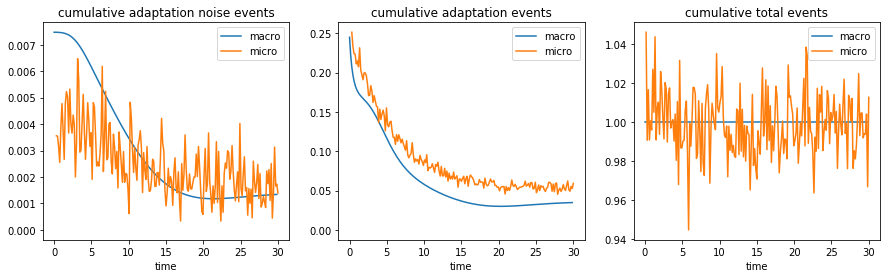

In [5]:
fig, ax = plt.subplots(ncols=3)
fig.set_figwidth(15)
macro_data['W_an'].plot(ax=ax[0], label='macro')
micro_rate['E_an'].plot(ax=ax[0], label='micro')
ax[0].set_title('cumulative adaptation noise events')
ax[0].legend()
macro_data['W_a'].plot(ax=ax[1], label='macro')
micro_rate['E_a'].plot(ax=ax[1], label='micro')
ax[1].set_title('cumulative adaptation events')
ax[1].legend()
macro_data['W_tot'].plot(ax=ax[2], label='macro')
micro_rate['E_tot'].plot(ax=ax[2], label='micro')
ax[2].set_title('cumulative total events')
#ax[2].set_ylim([.9, 1.1])
ax[2].legend()

/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


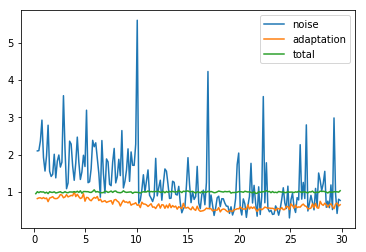

In [6]:
fig2, ax2 = plt.subplots(1)
ax2.plot(macro_data.index.values, macro_data['W_an'].values/micro_rate['E_an'].values, label='noise')
ax2.plot(macro_data.index.values, macro_data['W_a'].values/micro_rate['E_a'].values, label='adaptation')
ax2.plot(macro_data.index.values, macro_data['W_tot'].values/micro_rate['E_tot'].values, label='total')
ax2.legend()

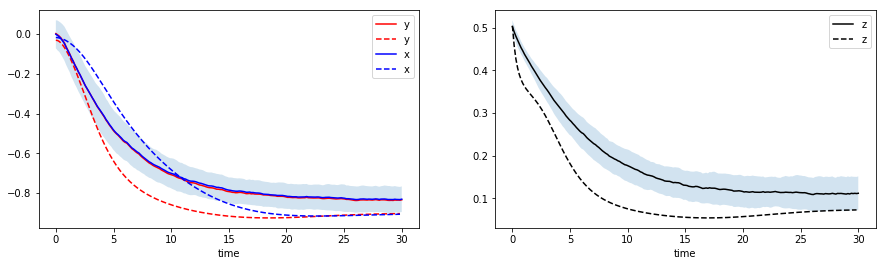

In [7]:
fig, ax = plt.subplots(ncols=2)
fig.set_figwidth(15)
micro_data[['y']].plot(ax=ax[0], color='r', label='y micro', legend=False)
macro_data[['y']].plot(ax=ax[0], color='r', label='y approx', legend=False, style='--')
ax[0].legend()
micro_data[['x']].plot(ax=ax[0], color='b', label='x micro', legend=False)

x = micro_data[['x']].values.T[0]
dx = micro_sem[['x']].values.T[0]
ax[0].fill_between(micro_data.index.values, x+dx, x-dx, alpha=.2)

macro_data[['x']].plot(ax=ax[0], color='b', label='x approx', legend=False, style='--')
ax[0].legend()


micro_data[['z']].plot(ax=ax[1], color='k', label='z micro', legend=False)

x = micro_data[['z']].values.T[0]
dx = micro_sem[['z']].values.T[0]
ax[1].fill_between(micro_data.index.values, x+dx, x-dx, alpha=.2)

macro_data[['z']].plot(ax=ax[1], color='k', label='z approx', legend=False, style='--')
ax[1].legend()

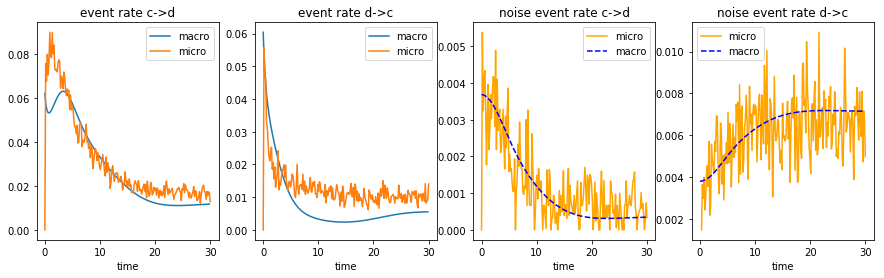

In [8]:
fig, ax = plt.subplots(ncols=4)
fig.set_figwidth(15)
macro_data['W_i_cd'].plot(ax=ax[0], label='macro')
micro_rate['E_i_cd'].plot(ax=ax[0], label='micro')
ax[0].set_title('event rate c->d')
ax[0].legend()
macro_data['W_i_dc'].plot(ax=ax[1], label='macro')
micro_rate['E_i_dc'].plot(ax=ax[1], label='micro')
ax[1].set_title('event rate d->c')
ax[1].legend()
micro_rate['E_in_cd'].plot(ax=ax[2], label='micro', style='-', color='orange')
macro_data['W_in_cd'].plot(ax=ax[2], label='macro', style='--', color='b')
micro_rate['E_in_dc'].plot(ax=ax[3], label='micro', style='-', color='orange')
macro_data['W_in_dc'].plot(ax=ax[3], label='macro', style='--', color='b')
ax[2].set_title('noise event rate c->d')
ax[3].set_title('noise event rate d->c')
#ax[2].set_ylim([.9, 1.1])
ax[2].legend()
ax[3].legend()

With regards to imitation probabilities, there are two ways to look at it. 
* I can sample actual imitation probabilities, then average and then compare between micro and approximation
* I can look at the approximation of the imitation probabilities in the approximation and see, how good they are compared to the full form.

In [75]:
with pd.HDFStore('/home/jakob/Project_Divestment/PyDivestment/output_data/P7/micro/switch.h5') as store:
    switch_data = store.select('dat_1', 'approximate = 1 & test = 0')
switch_data.index = switch_data.index.droplevel(['approximate', 'test', 'sample'])
switch_data.loc[:, 'time'] = pd.Series(switch_data.index.values, index=switch_data.index)
switch_data.sort_index(inplace=True)
switch_data.head()

,$K^{(c)}$,$K^{(d)}$,Direction,Income of active agent,Income of neighbor,Imitation,Probability,time
time,,,,,,,,
0.000349,0.250130,0.249993,0,1.321080,1.321148,False,0.500052,0.000349
0.000598,0.249990,0.250202,1,1.321268,1.321199,False,0.499948,0.000598
0.000699,0.250231,0.249988,0,1.321197,1.321266,False,0.500052,0.000699
0.000706,0.249988,0.250233,1,1.321268,1.321200,False,0.499948,0.000706
0.000753,0.250246,0.249987,0,1.321199,1.321267,False,0.500052,0.000753


In [76]:
switch_datacd = switch_data.loc[switch_data['Direction']==0]
switch_datadc = switch_data.loc[switch_data['Direction']==1]

In [77]:
def running_mean(x, N):
    x = x.T[0]
    return np.convolve(x, np.ones((N,))/N, mode='valid')

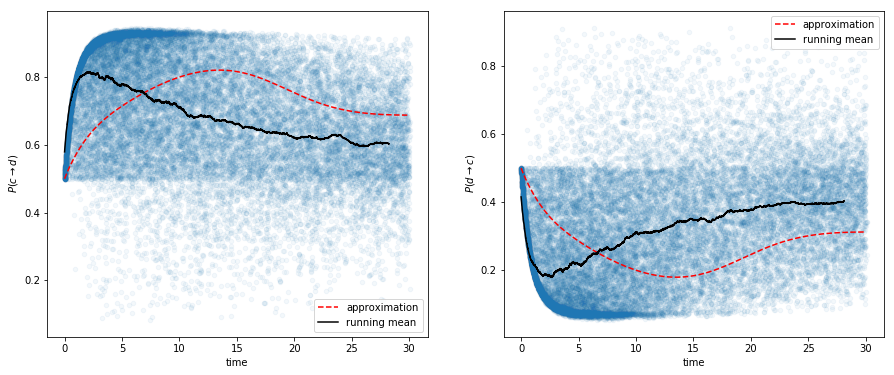

In [78]:
fig, axes = plt.subplots(ncols=2)
fig.set_figwidth(15)
fig.set_figheight(6)

switch_datacd.plot.scatter(ax=axes[0], x='time', y='Probability', alpha=.05)
macro_data[['Pcd']].plot(color='red', ax=axes[0], style='--')

w = 1000
axes[0].plot(switch_datacd.index.values[:-w+1], running_mean(switch_datacd[['Probability']].values, w),
          '-', color='k', label='running mean')
axes[0].legend(['approximation', 'running mean'])
axes[0].set_ylabel(r'$P(c \rightarrow d)$')

switch_datadc.plot.scatter(ax=axes[1], x='time', y='Probability', alpha=.05)
macro_data[['Pdc']].plot(color='red', ax=axes[1], style='--', label='approximation')

axes[1].plot(switch_datadc.index.values[:-w+1], running_mean(switch_datadc[['Probability']].values, w),
          '-', color='k', label='running mean')
axes[1].legend(['approximation', 'running mean'])
axes[1].set_ylabel(r'$P(d \rightarrow c)$')

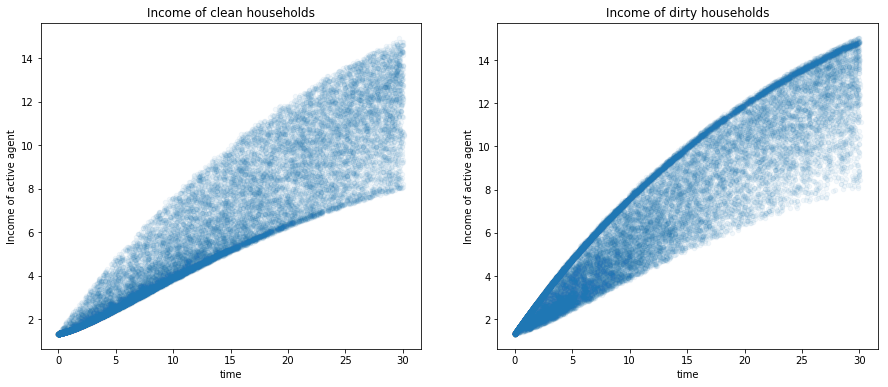

In [82]:
fig, axes = plt.subplots(ncols=2)
fig.set_figwidth(15)
fig.set_figheight(6)
axes[0].set_title('Income of clean households')
switch_datacd.plot.scatter(ax=axes[0], x='time', y='Income of active agent', alpha=0.05)
macro_data[['W_c']].plot(ax=axes[0], color=)
axes[1].set_title('Income of dirty households')
switch_datadc.plot.scatter(ax=axes[1], x='time', y='Income of active agent', alpha=0.05)